👍 실무적인 EDA 탐색적 분석에서는 여러 변수들의 조합에 대한 동일 패턴 반복 검토 흔함

👍 Heatmap 은 EDA 탐색적 분석에서 반복적 사용하기 좋음 = 매우 유용

👍 matplotlib.scatter() 사용하는 방식 Vs. seaborn.heatmap() 선택?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
dff01 = pd.read_csv('https://t1.daumcdn.net/cfile/blog/992CFF3B5D5CC70C2C?download')
dff01.head()

,age,height,weight,amt_strbk,amt_book
0,28,157,52,22300,0
1,28,154,47,35100,0
2,28,155,52,21300,0
3,27,155,44,0,0
4,28,155,51,17500,0


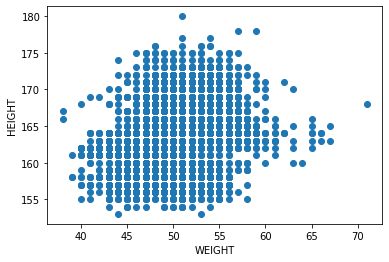

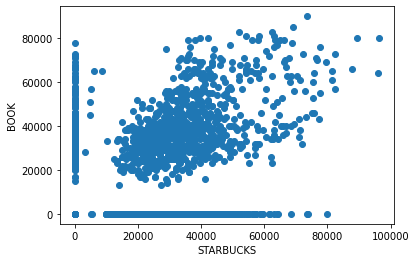

In [3]:
# matplotlib scatter 사용

plt.scatter(dff01.weight, dff01.height)
plt.xlabel('WEIGHT')
plt.ylabel('HEIGHT')
plt.show()

plt.scatter(dff01.amt_strbk, dff01.amt_book)
plt.xlabel('STARBUCKS')
plt.ylabel('BOOK')
plt.show()

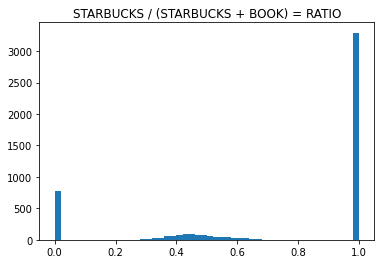

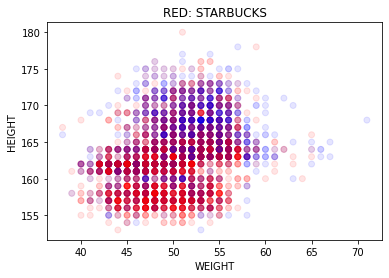

In [4]:
dff01['rto_strbk'] = dff01.amt_strbk / (dff01.amt_strbk + dff01.amt_book + 0.001) # 0.001 더해준 이유 : 둘 다 사지않은 고객도 있을 수 있으므로
plt.hist(dff01.rto_strbk, bins=50)
plt.title('STARBUCKS / (STARBUCKS + BOOK) = RATIO')
plt.show()

colors1 = ['red' if x>=0.99 else 'blue' for x in dff01.rto_strbk]
plt.scatter(dff01.weight, dff01.height,
        alpha=0.1, color=colors1)
plt.xlabel('WEIGHT')
plt.ylabel('HEIGHT')
plt.title('RED: STARBUCKS')
plt.show()

   height  weight  rto_strbk  cnt_cust
0     153      44        1.0         1
1     153      53        0.0         1
2     154      43        1.0         1


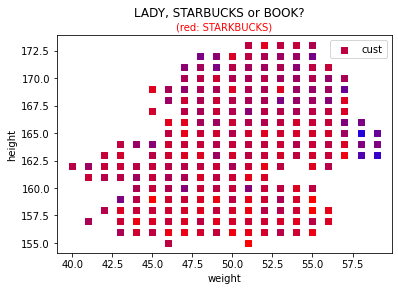

In [6]:
dfc02z = dff01[['rto_strbk', 'height', 'weight']].groupby(['height', 'weight']).mean().reset_index()
dfc02z1 = dff01[['rto_strbk', 'height', 'weight']].groupby(['height', 'weight']).count().reset_index()
dfc02z1.columns = ['height', 'weight', 'cnt_cust']
dfc02z2 = dfc02z.merge(dfc02z1, how='left', on=['height', 'weight'])
ts =  dfc02z2.rto_strbk.reset_index().rto_strbk
print(dfc02z2.head(3))

colors1 = [(x, 0, 1-x) for x in ts]

# ncust = mnmx_scl2(dfc02z2.cnt_cust)
# plt.hist(dfc02z2.cnt_cust, bins=50)
# plt.show()

dfc02z2 = dfc02z2[dfc02z2.cnt_cust>=5]
# ncust = mnmx_scl2(dfc02z2.cnt_cust)
# plt.hist(dfc02z2.cnt_cust, bins=50)
# plt.show()
# subset and update
dfc02z2 = dfc02z2[dfc02z2.cnt_cust>=5]

# reset color code list from the updated df
colors1 = [(x, 0, 1-x) for x in dfc02z2.rto_strbk]

# check if the number of rows (df) matches the number of element of color code list
len(colors1), len(dfc02z2), len(colors1) == len(dfc02z2)
plt.scatter(dfc02z2.weight, dfc02z2.height, 
            color=colors1, marker='s')
plt.legend(['cust'])
plt.xlabel('weight')
plt.ylabel('height')
plt.suptitle('LADY, STARBUCKS or BOOK?')
plt.title('(red: STARKBUCKS)', size=10, color='r')
plt.show()

In [7]:
dfc02z21 = dfc02z2
dfc02z21.drop(['cnt_cust'], axis=1)
dfc02z21.head()

,height,weight,rto_strbk,cnt_cust
16,155,46,0.742790,6
21,155,51,1.000000,6
30,156,43,0.666667,6
31,156,44,0.812500,16
32,156,45,0.750000,12


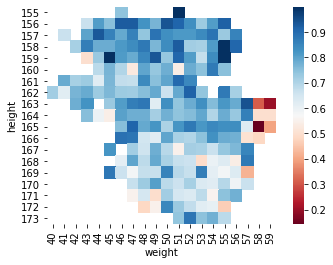

In [8]:
import seaborn as sns

# 피보팅을!
dfc02z21 = dfc02z21.pivot(index='height', columns='weight',
                         values='rto_strbk')

sns.heatmap(dfc02z21, 
            cmap='RdBu',
            square=True)
plt.show()

In [9]:
print('피보팅된 테이블\n--------------')
dfc02z21[[45,46,47,48,49,50]].head()

피보팅된 테이블
--------------


weight,45,46,47,48,49,50
height,,,,,,
155,NaN,0.742790,NaN,NaN,NaN,NaN
156,0.750000,0.928571,0.926997,0.827061,0.769231,0.941176
157,0.860032,0.789474,0.861700,0.739236,0.887682,0.834955
158,0.782934,0.816333,0.840793,0.876252,0.767102,0.841637
159,1.000000,0.813832,0.787359,0.851208,0.937500,0.736842


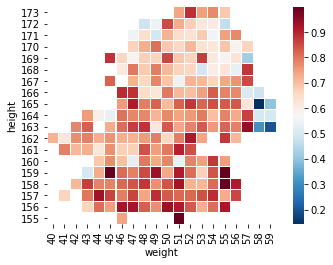

In [10]:
import seaborn as sns

dfc02z21 = dfc02z2.pivot(index='height', columns='weight', 
                         values='rto_strbk')

# Y축 값을 재정렬 (큰 값에서 작은 값의 순서로)
dfc02z21 = dfc02z21.sort_values('height', ascending=False)

sns.heatmap(dfc02z21, 
            cmap='RdBu_r',  # 컬러맵을 반대로
            square=True, linewidth=0.1)
plt.show()

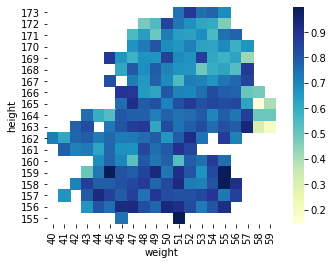

In [11]:
# 색상을 바꿔 보면 ?
sns.heatmap(dfc02z21, 
            cmap="YlGnBu",
            square=True)
plt.show()

scatter plot 에서 cell의 크기로 사람수를 표시해보면?¶


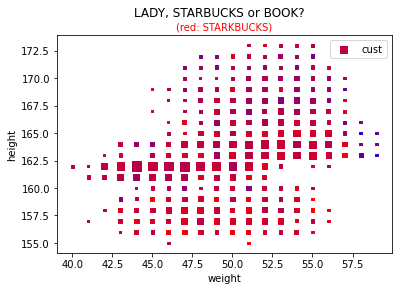

In [12]:
plt.scatter(dfc02z2.weight, dfc02z2.height, 
            s=dfc02z2.cnt_cust, color=colors1, marker='s')
plt.legend(['cust'])
plt.xlabel('weight')
plt.ylabel('height')
plt.suptitle('LADY, STARBUCKS or BOOK?')
plt.title('(red: STARKBUCKS)', size=10, color='r')
plt.show()